In [5]:
# Fundamental modules/libraries
import pandas as pd
import numpy as np

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Regression algorithms 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
from sklearn.metrics import mean_squared_error as MSE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import plotly.express as px
from matplotlib.ticker import FormatStrFormatter

/home/jeraldo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
df = pd.read_csv('db_ande_L.csv')               
X = df.drop('DTT_Fe_Conc_Grade', axis=1)
X = X.drop(columns=['Unnamed: 0']) 
y = df['DTT_Fe_Conc_Grade']
y = y.drop(columns=['Unnamed: 0']) 

In [7]:
y

0     38.330000
1     38.330000
2     48.600000
3     37.300000
4     35.490000
        ...    
94    64.917759
95    68.217361
96    53.944663
97    60.083458
98    30.233566
Name: DTT_Fe_Conc_Grade, Length: 99, dtype: float64

In [8]:
# Data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
y_train

49    65.290000
70    50.420000
68    53.770000
15    54.010000
39    52.340000
        ...    
60    69.560000
71    50.420000
14    58.720000
92    68.063892
51    67.300000
Name: DTT_Fe_Conc_Grade, Length: 79, dtype: float64

## Linear Regression Model

In [10]:
X.shape

(99, 17)

In [11]:
num_feat = X.select_dtypes(exclude=['object'])
num_feat.shape

(99, 16)

In [12]:
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mid_x              99 non-null     float64
 1   mid_y              99 non-null     float64
 2   mid_z              99 non-null     float64
 3   DTT_Mass_Recovery  99 non-null     float64
 4   MS_Actual          99 non-null     float64
 5   Al_pct             99 non-null     float64
 6   Ca_pct             99 non-null     float64
 7   Fe_pct             99 non-null     float64
 8   K_pct              99 non-null     float64
 9   Mg_pct             99 non-null     float64
 10  Na_pct             99 non-null     float64
 11  P_ppm              99 non-null     int64  
 12  S_pct              99 non-null     float64
 13  Si_pct             99 non-null     float64
 14  Ti_pct             99 non-null     float64
 15  Py                 99 non-null     float64
dtypes: float64(15), int64(1)
mem

In [13]:
# Data split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(num_feat, y, test_size=0.2, random_state=42)

In [14]:
X_train_lr.columns

Index(['mid_x', 'mid_y', 'mid_z', 'DTT_Mass_Recovery', 'MS_Actual', 'Al_pct',
       'Ca_pct', 'Fe_pct', 'K_pct', 'Mg_pct', 'Na_pct', 'P_ppm', 'S_pct',
       'Si_pct', 'Ti_pct', 'Py'],
      dtype='object')

In [15]:
lr = LinearRegression()

In [16]:
model_lr = lr.fit(X_train_lr, y_train_lr)

In [17]:
y_pred_lr = model_lr.predict(X_test_lr)

In [18]:
# Metrics for the prediction

mse = mean_squared_error(y_test, y_pred_lr)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred_lr)

rsquared = r2_score(y_test, y_pred_lr)

max_error = max_error(y_test, y_pred_lr)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 118.04
RMSE = 10.86
MAE = 7.66
R2 = 0.19
Max Error = 25.87


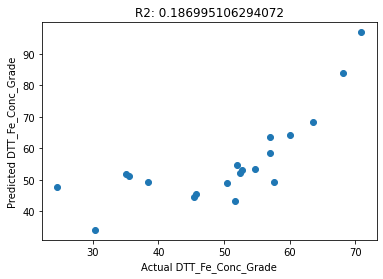

In [19]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lr)
ax.set_xlabel('Actual DTT_Fe_Conc_Grade')
ax.set_ylabel('Predicted DTT_Fe_Conc_Grade')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred_lr)))

plt.show()

In [20]:
# y_test['residuals'] = y_test['DTT_Fe_Conc_Grade'] - y_test['prediction']
residuals = y_test[0] - y_pred_lr
residuals = pd.DataFrame(residuals)
residuals

,0
0,-58.475323
1,-10.617487
2,-45.706144
3,-20.131911
4,-25.863713
5,4.279144
6,-6.052548
7,-16.366733
8,-13.644978
9,-10.815818


## XGB Model

In [21]:
xgb = XGBRegressor(random_state=42)

In [22]:
model_xgb = xgb.fit(X_train_lr, y_train_lr)

/home/jeraldo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [23]:
y_pred_xgb = model_xgb.predict(X_test_lr)

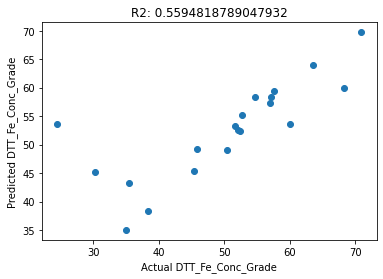

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_xgb)
ax.set_xlabel('Actual DTT_Fe_Conc_Grade')
ax.set_ylabel('Predicted DTT_Fe_Conc_Grade')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred_xgb)))

plt.show()

In [28]:
residuals = y_test_lr[0] - y_pred_lr
residuals
y_pred_lr

array([96.8053232 , 48.9474874 , 84.03614362, 58.46191129, 64.19371296,
       34.05085645, 44.38254751, 54.69673279, 51.97497779, 49.14581845,
       53.22500017, 52.08268046, 53.52033797, 63.43883847, 47.84318516,
       51.12827361, 49.36274823, 45.33327109, 68.27803705, 43.20529378])

# Prediction

In [196]:
# The prediction is conducted with Extreme Gradient Boosting algorithm

X_drillholes = pd.read_csv('DB_Fe_conc_predictions_sulfides_ande_L.csv', index_col=[0])
X_drillholes.shape

(395, 16)

In [197]:
y_pred_drillholes = model_xgb.predict(X_drillholes)

In [198]:
type(y_pred_drillholes)

numpy.ndarray

In [199]:
np.median(y_pred_drillholes)

53.141823

In [200]:
y_pred_drillholes = pd.DataFrame([y_pred_drillholes]).T

In [174]:
y_pred_drillholes.to_csv('y_pred_drillholes_ande_L.csv')